In [3]:
%pip install seaborn
%pip install folium

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:
# Import Primary Modules:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [7]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [11]:

# Load dataset from URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

data = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')
print(data.head())
print(data.columns)


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

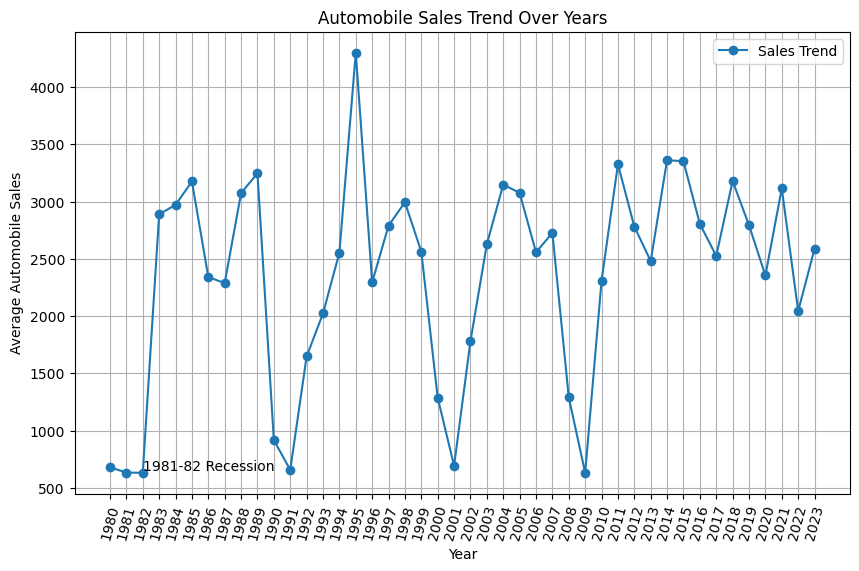

In [15]:
# TASK 1.1: Line Chart of Automobile Sales by Year
data_grouped = data.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
data_grouped.plot(kind='line', marker='o')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel("Year")
plt.ylabel("Average Automobile Sales")
plt.title("Automobile Sales Trend Over Years")
plt.text(1982, 650, '1981-82 Recession')
plt.legend(["Sales Trend"])
plt.grid()
plt.show()


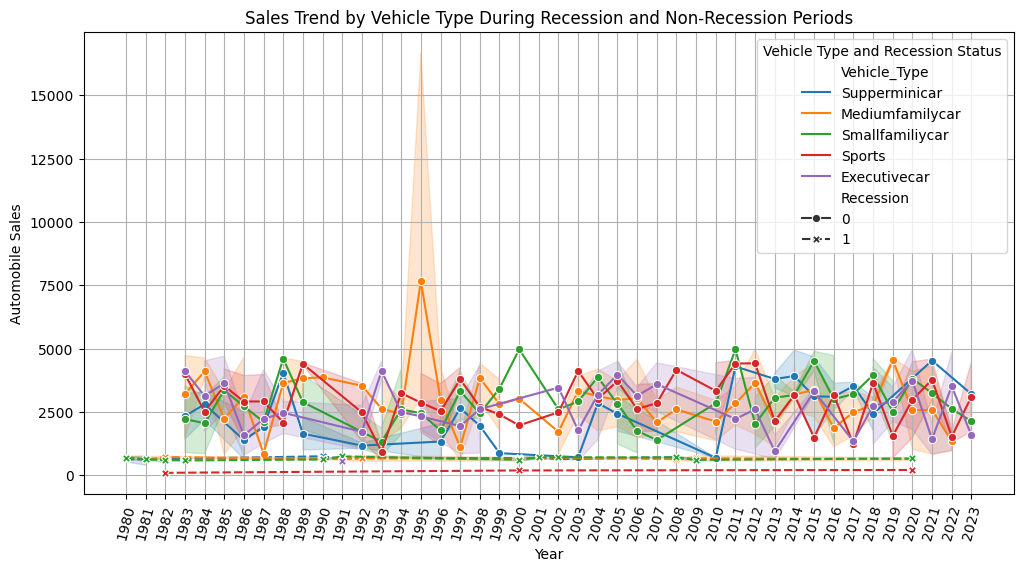

In [18]:
# TASK 1.2: Line Chart of Automobile Sales by Vehicle Type during Recession and Non-Recession Periods
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', markers=True)
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Sales Trend by Vehicle Type During Recession and Non-Recession Periods")
plt.legend(title="Vehicle Type and Recession Status")
plt.grid()
plt.show()

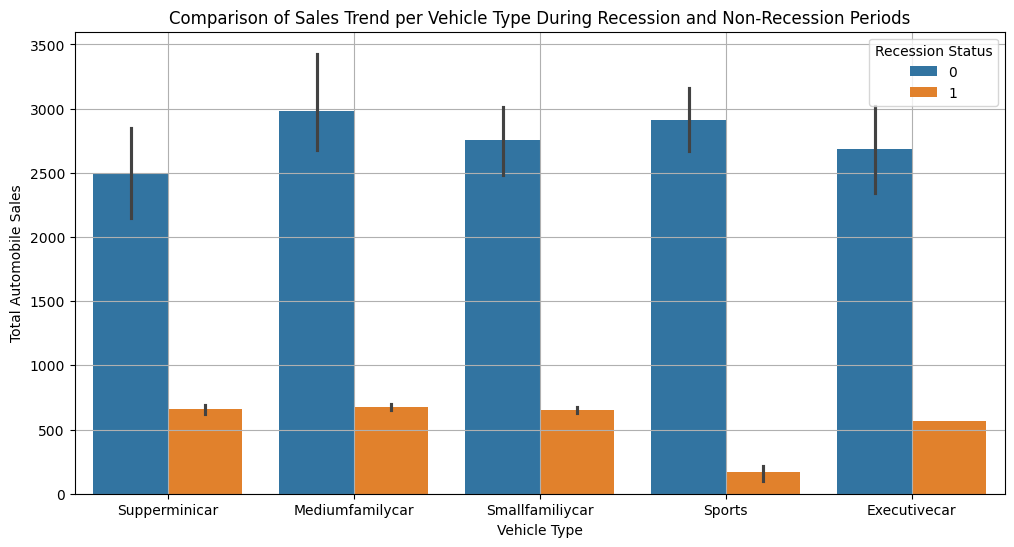

In [19]:
# TASK 1.3: Seaborn Visualization of Sales Trend per Vehicle Type (Recession vs. Non-Recession)
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')
plt.xlabel("Vehicle Type")
plt.ylabel("Total Automobile Sales")
plt.title("Comparison of Sales Trend per Vehicle Type During Recession and Non-Recession Periods")
plt.legend(title="Recession Status")
plt.grid()
plt.show()

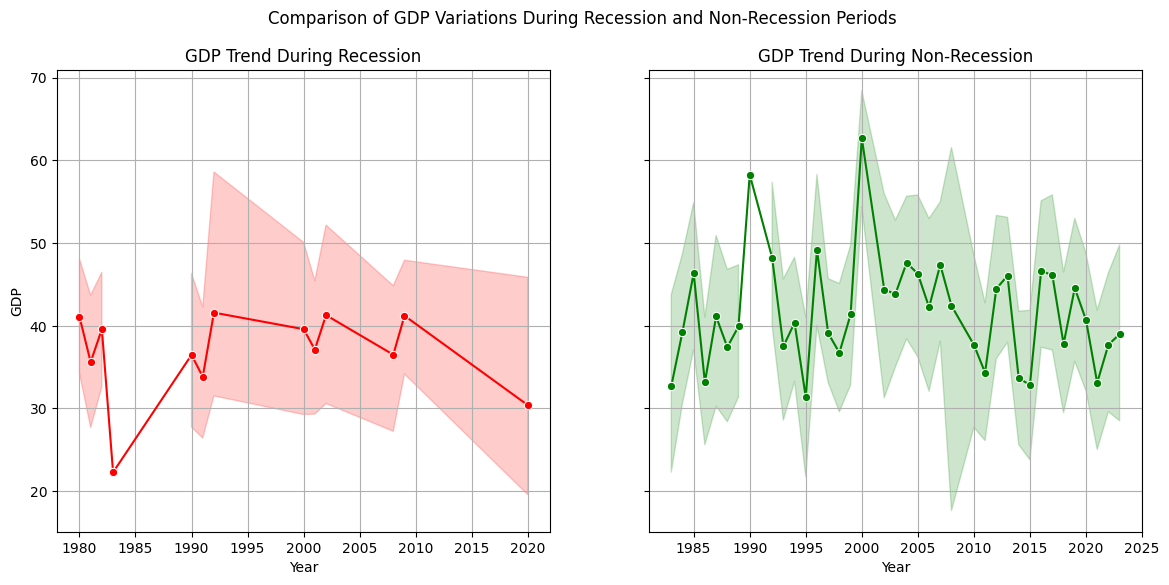

In [20]:
# TASK 1.4: Subplot for GDP Variations During Recession and Non-Recession Periods
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Recession period GDP plot
sns.lineplot(ax=axes[0], data=data[data['Recession'] == 1], x='Year', y='GDP', marker='o', color='red')
axes[0].set_title("GDP Trend During Recession")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP")
axes[0].grid()

# Non-recession period GDP plot
sns.lineplot(ax=axes[1], data=data[data['Recession'] == 0], x='Year', y='GDP', marker='o', color='green')
axes[1].set_title("GDP Trend During Non-Recession")
axes[1].set_xlabel("Year")
axes[1].grid()

plt.suptitle("Comparison of GDP Variations During Recession and Non-Recession Periods")
plt.show()

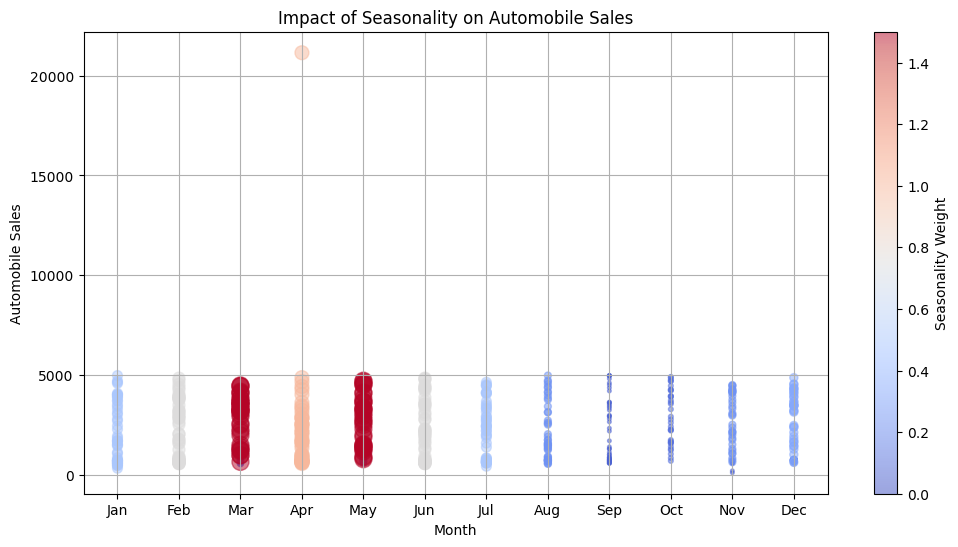

In [21]:
# TASK 1.5: Bubble Plot for Seasonality Impact on Automobile Sales
plt.figure(figsize=(12, 6))
plt.scatter(data['Month'], data['Automobile_Sales'], s=data['Seasonality_Weight'] * 100, alpha=0.5, c=data['Seasonality_Weight'], cmap='coolwarm')
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Impact of Seasonality on Automobile Sales")
plt.colorbar(label="Seasonality Weight")
plt.grid()
plt.show()

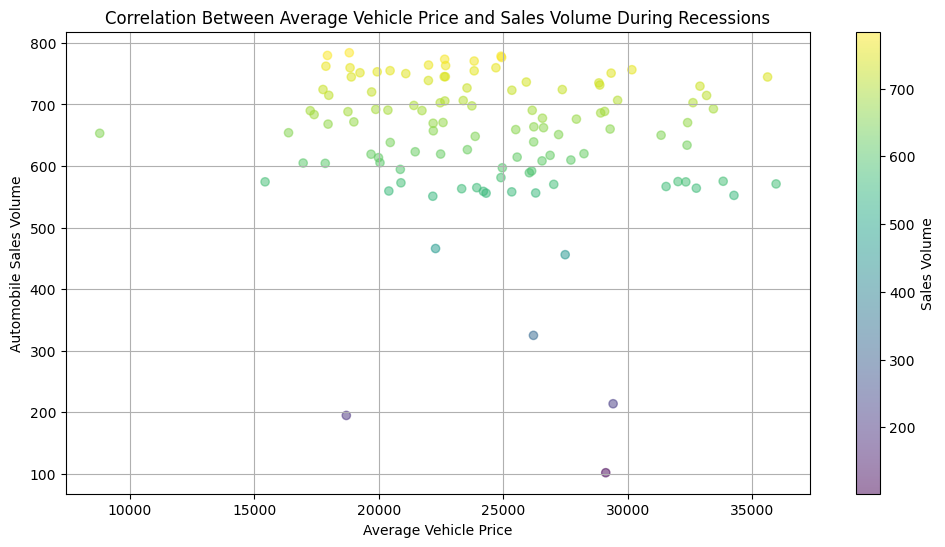

In [22]:
# TASK 1.6: Scatter Plot for Correlation Between Average Vehicle Price and Sales Volume During Recession
plt.figure(figsize=(12, 6))
data_recession = data[data['Recession'] == 1]
plt.scatter(data_recession['Price'], data_recession['Automobile_Sales'], alpha=0.5, c=data_recession['Automobile_Sales'], cmap='viridis')
plt.xlabel("Average Vehicle Price")
plt.ylabel("Automobile Sales Volume")
plt.title("Correlation Between Average Vehicle Price and Sales Volume During Recessions")
plt.colorbar(label="Sales Volume")
plt.grid()
plt.show()

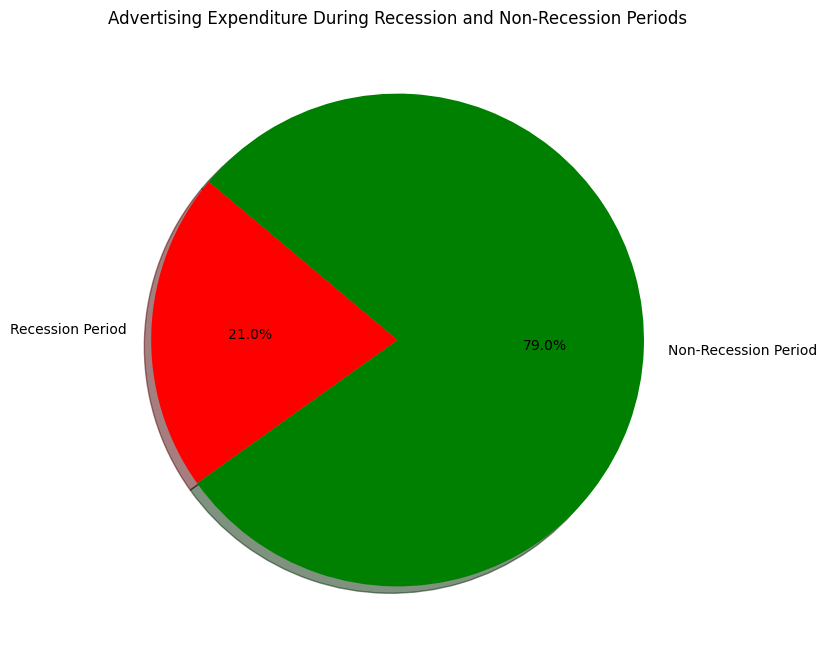

In [23]:
# TASK 1.7: Pie Chart for Advertising Expenditure During Recession and Non-Recession
ad_exp_recession = data[data['Recession'] == 1]['Advertising_Expenditure'].sum()
ad_exp_non_recession = data[data['Recession'] == 0]['Advertising_Expenditure'].sum()
labels = ['Recession Period', 'Non-Recession Period']
sizes = [ad_exp_recession, ad_exp_non_recession]
colors = ['red', 'green']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)
plt.title("Advertising Expenditure During Recession and Non-Recession Periods")
plt.show()

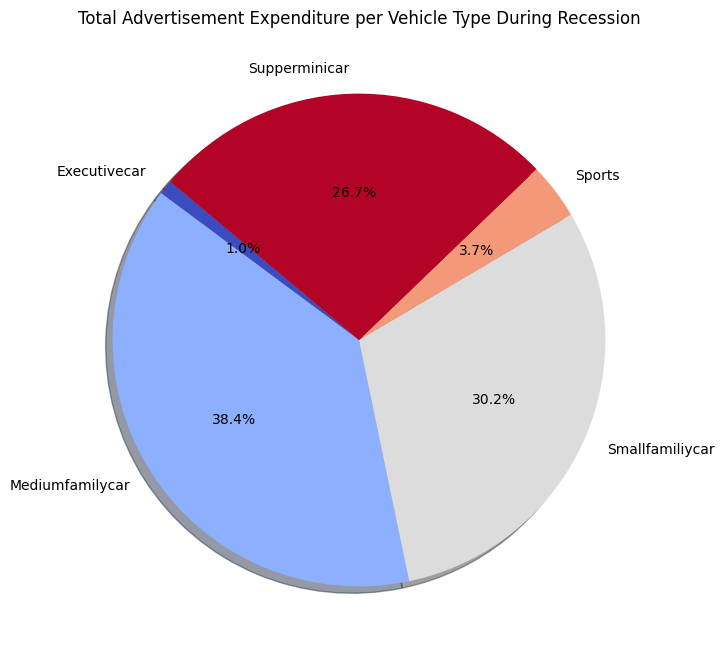

In [27]:
# TASK 1.8: Pie Chart for Advertisement Expenditure per Vehicle Type During Recession
ad_exp_by_vehicle = data[data['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 8))
colors = plt.cm.coolwarm(np.linspace(0, 1, len(ad_exp_by_vehicle)))  # Generate colors manually
plt.pie(ad_exp_by_vehicle, labels=ad_exp_by_vehicle.index, autopct='%1.1f%%', startangle=140, shadow=True, colors=colors)
plt.title("Total Advertisement Expenditure per Vehicle Type During Recession")
plt.show()

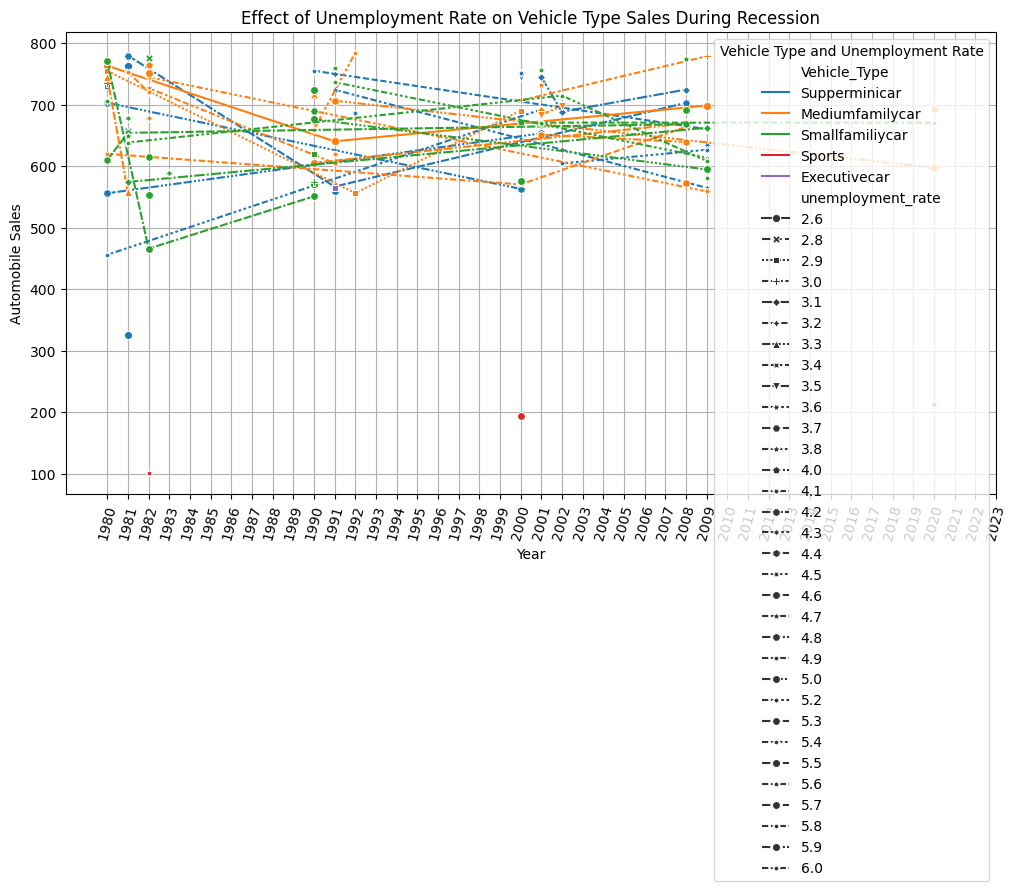

In [28]:
# TASK 1.9: Line Plot for Effect of Unemployment Rate on Vehicle Type Sales During Recession
plt.figure(figsize=(12, 6))
sns.lineplot(data=data[data['Recession'] == 1], x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='unemployment_rate', markers=True)
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Effect of Unemployment Rate on Vehicle Type Sales During Recession")
plt.legend(title="Vehicle Type and Unemployment Rate")
plt.grid()
plt.show()